# Лабораторная работа №1
## Выполнил студент группы БФИ2201 Балыко Владислав Васильевич

> Дополнительные модули, использованные при выполнение лабораторной

In [14]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

### Задание
Изучить зависимость времени выполнения алгоритмов сортировки от размера входных данных и провести анализ их сложности.

#### Сортировка Шелла,Турнирная сортировка,Пузырьковая сортировка и их графики

In [17]:
# Реализация алгоритмов сортировки
def shell_sort(arr):
    n = len(arr)
    gap = n // 2

    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2

    return arr

def tournament_sort(arr):
    from math import ceil, log2
    
    def build_tournament(arr):
        n = len(arr)
        num_nodes = 2 ** ceil(log2(n))
        tree = [float('inf')] * (2 * num_nodes - 1)
        for i in range(n):
            tree[num_nodes - 1 + i] = arr[i]
        for i in range(num_nodes - 2, -1, -1):
            tree[i] = min(tree[2 * i + 1], tree[2 * i + 2])
        return tree, num_nodes

    def update_tree(tree, idx, num_nodes):
        tree[num_nodes - 1 + idx] = float('inf')
        parent = (num_nodes - 1 + idx - 1) // 2
        while parent >= 0:
            left = tree[2 * parent + 1]
            right = tree[2 * parent + 2]
            tree[parent] = min(left, right)
            if parent == 0:
                break
            parent = (parent - 1) // 2

    def extract_min(tree):
        return tree[0]

    n = len(arr)
    tree, num_nodes = build_tournament(arr)
    result = []
    for _ in range(n):
        min_val = extract_min(tree)
        result.append(min_val)
        idx = tree[num_nodes - 1:].index(min_val)
        update_tree(tree, idx, num_nodes)

    return result

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

# Генерация данных и измерение времени выполнения
sizes = [100, 500, 1000, 5000, 20000]
data = []

for size in sizes:
    arr = [random.randint(1, 10000) for _ in range(size)]
    
    start_time = time.time()
    shell_sort(arr.copy())
    shell_time = time.time() - start_time
    
    start_time = time.time()
    tournament_sort(arr.copy())
    tournament_time = time.time() - start_time
    
    start_time = time.time()
    bubble_sort(arr.copy())
    bubble_time = time.time() - start_time
    
    data.append([size, shell_time, tournament_time, bubble_time])

df = pd.DataFrame(data, columns=["Размер массива", "Время выполнения сортировки Шелла", "Время выполнения турнирной сортировки", "Время выполнения пузырьковой сортировки"])
print(df)

   Размер массива  Время выполнения сортировки Шелла  \
0             100                           0.000000   
1             500                           0.000996   
2            1000                           0.000999   
3            5000                           0.005980   
4           20000                           0.033887   

   Время выполнения турнирной сортировки  \
0                               0.000997   
1                               0.003987   
2                               0.007939   
3                               0.181393   
4                               2.623867   

   Время выполнения пузырьковой сортировки  
0                                 0.000000  
1                                 0.009999  
2                                 0.022923  
3                                 0.652395  
4                                10.438557  


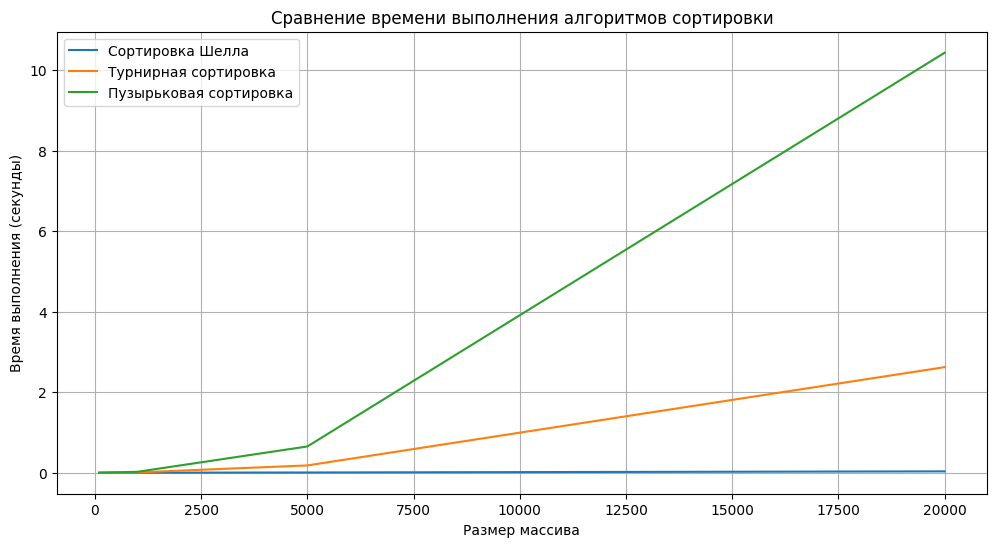

In [18]:
# Построение графиков
plt.figure(figsize=(12, 6))

plt.plot(df["Размер массива"], df["Время выполнения сортировки Шелла"], label="Сортировка Шелла")
plt.plot(df["Размер массива"], df["Время выполнения турнирной сортировки"], label="Турнирная сортировка")
plt.plot(df["Размер массива"], df["Время выполнения пузырьковой сортировки"], label="Пузырьковая сортировка")

plt.xlabel("Размер массива")
plt.ylabel("Время выполнения (секунды)")
plt.title("Сравнение времени выполнения алгоритмов сортировки")
plt.legend()
plt.grid(True)
plt.show()

### Анализ сложности алгоритмов

Сортировка Шелла:
Асимптотическая сложность: В среднем O(nlog^2n), в худшем случае O(n^2);
Анализ: Эффективность сортировки Шелла зависит от выбранной последовательности шагов (gap). Она быстрее, чем пузырьковая сортировка, для большинства практических случаев.

Турнирная сортировка:
Асимптотическая сложность: В среднем O(nlogn);
Анализ: Сложность аналогична куче (heap sort). На каждом этапе мы находим минимум и обновляем дерево, что приводит к логарифмической сложности на каждый из n элементов.

Пузырьковая сортировка:
Асимптотическая сложность: В худшем и среднем случаях O(n^2), в лучшем случае O(n) при отсортированном массиве.
Анализ: Очень неэффективный для больших массивов из-за квадратичной сложности. Обычно используется для обучения или небольших массивов.

### Вывод

Сортировка Шелла и турнирная сортировка значительно более эффективны по сравнению с пузырьковой сортировкой, особенно на больших массивах данных. Турнирная сортировка показывает лучшую асимптотическую сложность, но сортировка Шелла может быть более быстрой в некоторых случаях из-за меньшего коэффициента в её временной сложности.